In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
meantemp = pd.read_csv('DataTemp/Data01mean/Tempdatamean.csv',index_col = 1 , parse_dates=True)
maxtemp = pd.read_csv('DataTemp/Data03max/TX_STAID002759.txt',index_col = 1 , parse_dates=True, skiprows = 19)
mintemp = pd.read_csv('DataTemp/Data02min/TN_STAID002759.txt',index_col = 1 , parse_dates=True, skiprows = 19)

In [3]:
meantemp.rename(columns={'   TG' : 'meantemperature'}, inplace=True)
maxtemp.rename(columns={'   TX' : 'maxtemperature'}, inplace=True)
mintemp.rename(columns={'   TN' : 'mintemperature'}, inplace=True)

In [4]:
meantemp.rename_axis('Date',inplace=True)
maxtemp.rename_axis('Date',inplace=True)
mintemp.rename_axis('Date',inplace=True)

In [5]:
meantemp['meantemperature'] = meantemp['meantemperature'] *0.1
maxtemp['maxtemperature'] = maxtemp['maxtemperature'] *0.1
mintemp['mintemperature'] = mintemp['mintemperature'] *0.1

In [6]:
wmean = meantemp.loc[meantemp['meantemperature'] > -100 ] 
wmax = maxtemp.loc[maxtemp['maxtemperature'] > -100 ]
wmin = mintemp.loc[mintemp['mintemperature'] > -100 ]

In [7]:
wmean.drop([' SOUID',' Q_TG'],axis=1, inplace=True)
wmax.drop([' SOUID',' Q_TX'],axis=1, inplace=True)
wmin.drop([' SOUID',' Q_TN'],axis=1, inplace=True)

C:\Users\aoe\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
meantest = wmean[-10:]
maxtest = wmax[-10:]
mintest = wmin[-10:]

In [9]:
wmean = wmean[:-10]
wmax = wmax[:-10]
wmin = wmin[:-10]

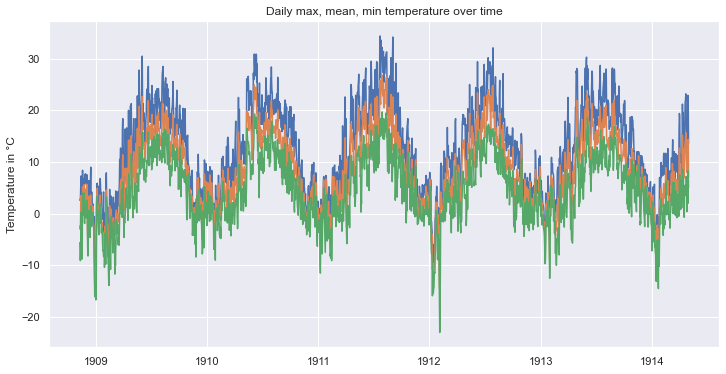

In [10]:
plt.title("Daily max, mean, min temperature over time")
plt.ylabel('Temperature in °C')
#plt.ylim(-20,40)
plt.plot(wmax.index[12000:14000],wmax['maxtemperature'][12000:14000])
plt.plot(wmean.index[12000:14000],wmean['meantemperature'][12000:14000])
plt.plot(wmin.index[12000:14000],wmin['mintemperature'][12000:14000])

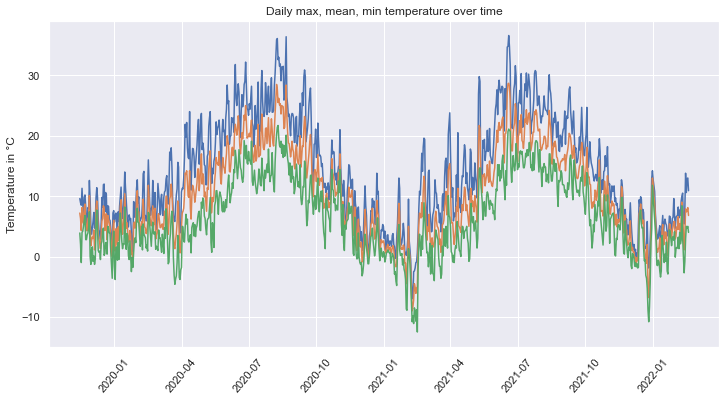

In [11]:
plt.title("Daily max, mean, min temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)
plt.plot(wmax['2019-11-15':'2022-02-25'])
plt.plot(wmean['2019-11-15':'2022-02-25'])
plt.plot(wmin['2019-11-15':'2022-02-25'])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
wmean['timestep'] = range(len(wmean))
wmax['timestep'] = range(len(wmax))
wmin['timestep'] = range(len(wmin))

In [14]:
Xmax = wmax[['timestep']] # matrix (or DataFrame)
ymax = wmax['maxtemperature'] # vector (or Series)
Xmean = wmean[['timestep']] # matrix (or DataFrame)
ymean = wmean['meantemperature'] # vector (or Series)
Xmin = wmin[['timestep']] # matrix (or DataFrame)
ymin = wmin['mintemperature'] # vector (or Series)

In [15]:
mx = LinearRegression()
mn = LinearRegression()
me = LinearRegression()

In [16]:
mx.fit(Xmax, ymax)
mn.fit(Xmin, ymin)
me.fit(Xmean, ymean)

LinearRegression()

In [17]:
wmax['trend'] = mx.predict(Xmax)
wmin['trend'] = mn.predict(Xmin)
wmean['trend'] = me.predict(Xmean)

<AxesSubplot:xlabel='Date'>

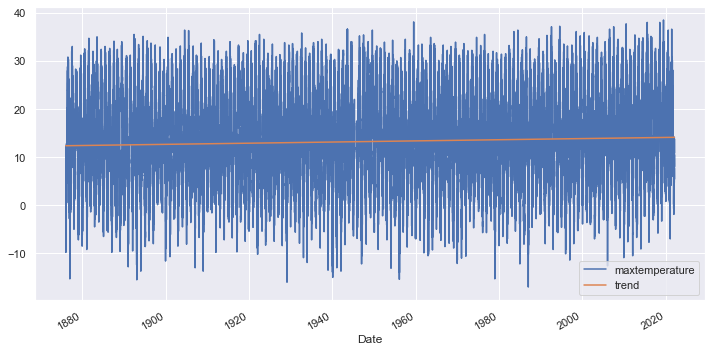

In [18]:
wmax[['maxtemperature', 'trend']].plot()

<AxesSubplot:xlabel='Date'>

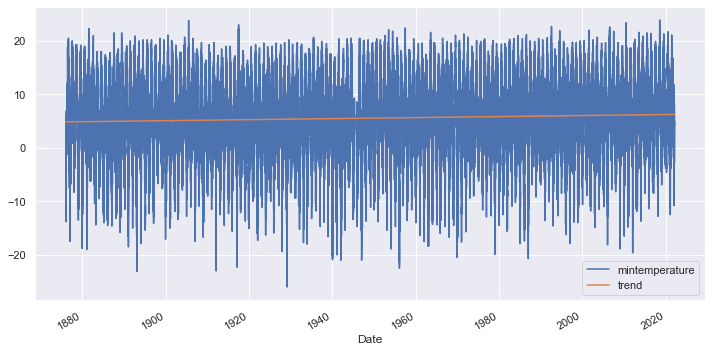

In [19]:
wmin[['mintemperature', 'trend']].plot()

<AxesSubplot:xlabel='Date'>

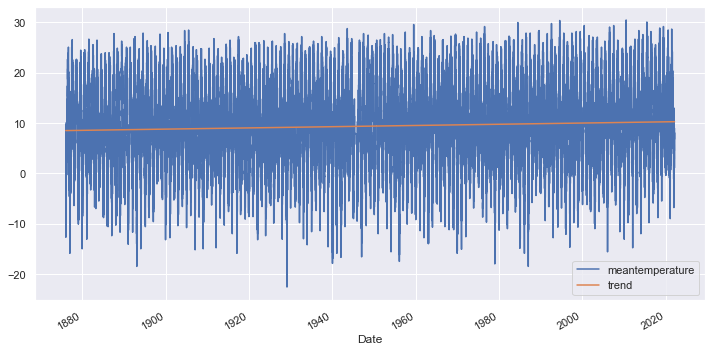

In [20]:
wmean[['meantemperature', 'trend']].plot()

In [21]:
wmax['wo_trend'] = wmax['maxtemperature'] - wmax['trend']
wmin['wo_trend'] = wmin['mintemperature'] - wmin['trend']
wmean['wo_trend'] = wmean['meantemperature'] - wmean['trend']

In [22]:
# One-Hot-Encoding the day
maxseasonal_dummies = pd.get_dummies(wmax.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(wmax.index)
meanseasonal_dummies = pd.get_dummies(wmean.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(wmean.index)
minseasonal_dummies = pd.get_dummies(wmin.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(wmin.index)

In [23]:
# join the dummies with the flights data frame
wmax = wmax.join(maxseasonal_dummies)
wmean = wmean.join(meanseasonal_dummies)
wmin = wmin.join(minseasonal_dummies)

In [24]:
Xmx = wmax.drop(columns=['maxtemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies
Xme = wmean.drop(columns=['meantemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies
Xmn = wmin.drop(columns=['mintemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies

In [25]:
mx.fit(Xmx, ymax)
mn.fit(Xme, ymean)
me.fit(Xmn, ymin)
# Create a model with trend and seasonality
wmax['trend + seasonal'] = mx.predict(Xmx)
wmin['trend + seasonal'] = mn.predict(Xmn)
wmean['trend + seasonal'] = me.predict(Xme)

<AxesSubplot:xlabel='Date'>

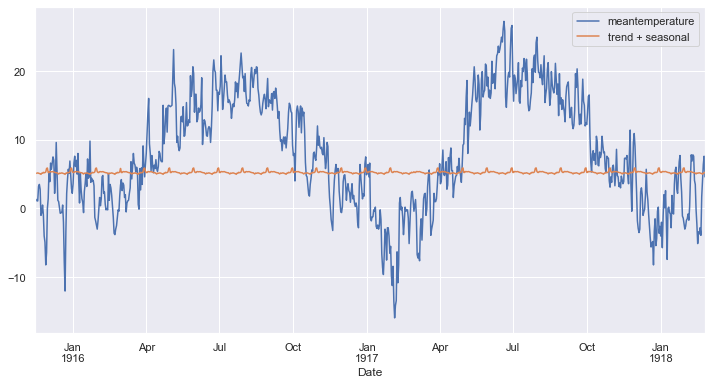

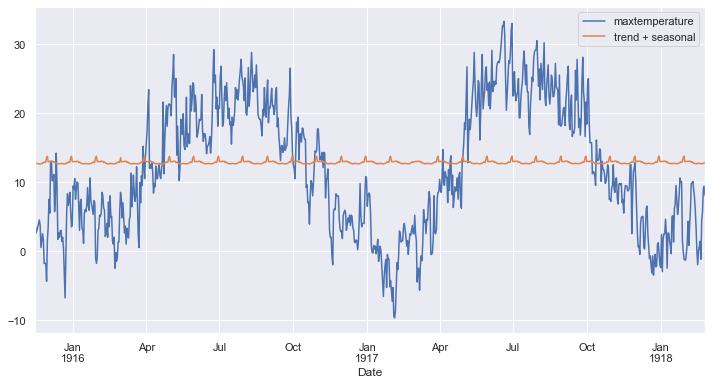

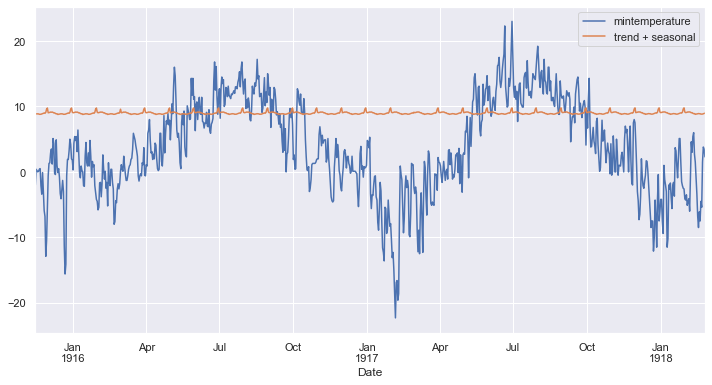

In [26]:
wmean['1915-11-15':'1918-02-25'][['meantemperature', 'trend + seasonal']].plot()
wmax['1915-11-15':'1918-02-25'][['maxtemperature', 'trend + seasonal']].plot()
wmin['1915-11-15':'1918-02-25'][['mintemperature', 'trend + seasonal']].plot()

In [27]:
wmax['remainder'] = wmax['maxtemperature'] - wmax['trend + seasonal']
wmin['remainder'] = wmin['mintemperature'] - wmin['trend + seasonal']
wmean['remainder'] = wmean['meantemperature'] - wmean['trend + seasonal']

<AxesSubplot:xlabel='Date'>

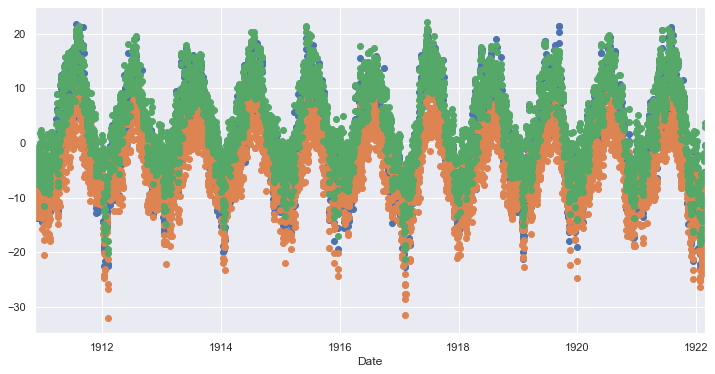

In [28]:
wmax['1910-11-15':'1922-02-25']['remainder'].plot(style='o')
wmin['1910-11-15':'1922-02-25']['remainder'].plot(style='o')
wmean['1910-11-15':'1922-02-25']['remainder'].plot(style='o')

In [29]:
wmax.columns

Index(['maxtemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal', 'remainder'],
      dtype='object')

In [30]:
rmax = wmax.drop(columns=['maxtemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal'])
rmin = wmin.drop(columns=['mintemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal'])
rmean = wmean.drop(columns=['meantemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal'])


In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

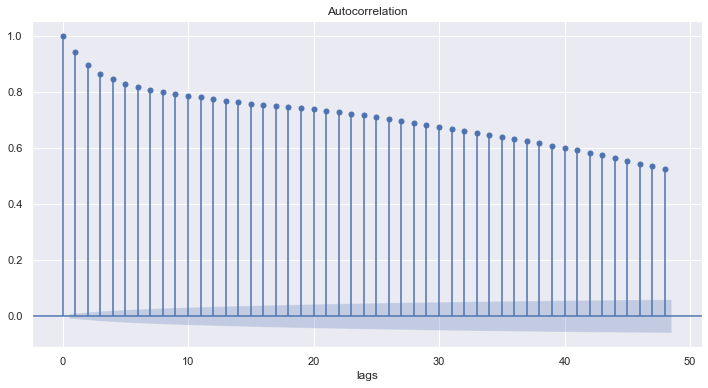

In [32]:
plot_acf(rmax['remainder'])
plt.xlabel('lags');

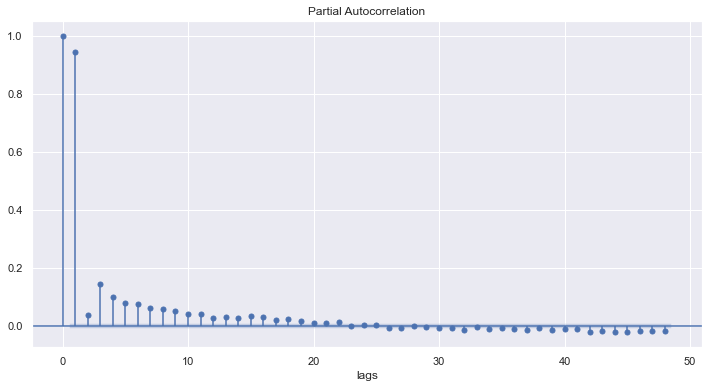

In [33]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function

plot_pacf(rmax['remainder'])
plt.xlabel('lags');

In [34]:
selected_order = ar_select_order(rmax['remainder'], maxlag = 22)
selected_order.ar_lags

C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [35]:
Nmax = wmax.drop(columns=['trend', 'wo_trend','trend + seasonal'])
Nmin = wmin.drop(columns=['trend', 'wo_trend','trend + seasonal'])
Nmean = wmean.drop(columns=['trend', 'wo_trend','trend + seasonal'])

In [36]:
Nmax['lag1'] = Nmax['remainder'].shift(1)
Nmax['lag2'] = Nmax['remainder'].shift(2)
Nmax['lag3'] = Nmax['remainder'].shift(3)
Nmax['lag4'] = Nmax['remainder'].shift(4)
Nmax['lag5'] = Nmax['remainder'].shift(5)
Nmax['lag6'] = Nmax['remainder'].shift(6)
Nmax['lag7'] = Nmax['remainder'].shift(7)
Nmax['lag8'] = Nmax['remainder'].shift(8)
Nmax['lag9'] = Nmax['remainder'].shift(9)
Nmax['lag10'] = Nmax['remainder'].shift(10)
Nmax['lag11'] = Nmax['remainder'].shift(11)
Nmax['lag12'] = Nmax['remainder'].shift(12)
Nmax['lag13'] = Nmax['remainder'].shift(13)
Nmax['lag14'] = Nmax['remainder'].shift(14)
Nmax['lag15'] = Nmax['remainder'].shift(15)
Nmax['lag16'] = Nmax['remainder'].shift(16)
Nmax['lag17'] = Nmax['remainder'].shift(17)
Nmax['lag18'] = Nmax['remainder'].shift(18)
Nmax['lag19'] = Nmax['remainder'].shift(19)

Nmin['lag1'] = Nmin['remainder'].shift(1)
Nmin['lag2'] = Nmin['remainder'].shift(2)
Nmin['lag3'] = Nmin['remainder'].shift(3)
Nmin['lag4'] = Nmin['remainder'].shift(4)
Nmin['lag5'] = Nmin['remainder'].shift(5)
Nmin['lag6'] = Nmin['remainder'].shift(6)
Nmin['lag7'] = Nmin['remainder'].shift(7)
Nmin['lag8'] = Nmin['remainder'].shift(8)
Nmin['lag9'] = Nmin['remainder'].shift(9)
Nmin['lag10'] = Nmin['remainder'].shift(10)
Nmin['lag11'] = Nmin['remainder'].shift(11)
Nmin['lag12'] = Nmin['remainder'].shift(12)
Nmin['lag13'] = Nmin['remainder'].shift(13)
Nmin['lag14'] = Nmin['remainder'].shift(14)
Nmin['lag15'] = Nmin['remainder'].shift(15)
Nmin['lag16'] = Nmin['remainder'].shift(16)
Nmin['lag17'] = Nmin['remainder'].shift(17)
Nmin['lag18'] = Nmin['remainder'].shift(18)
Nmin['lag19'] = Nmin['remainder'].shift(19)

Nmean['lag1'] = Nmean['remainder'].shift(1)
Nmean['lag2'] = Nmean['remainder'].shift(2)
Nmean['lag3'] = Nmean['remainder'].shift(3)
Nmean['lag4'] = Nmean['remainder'].shift(4)
Nmean['lag5'] = Nmean['remainder'].shift(5)
Nmean['lag6'] = Nmean['remainder'].shift(6)
Nmean['lag7'] = Nmean['remainder'].shift(7)
Nmean['lag8'] = Nmean['remainder'].shift(8)
Nmean['lag9'] = Nmean['remainder'].shift(9)
Nmean['lag10'] = Nmean['remainder'].shift(10)
Nmean['lag11'] = Nmean['remainder'].shift(11)
Nmean['lag12'] = Nmean['remainder'].shift(12)
Nmean['lag13'] = Nmean['remainder'].shift(13)
Nmean['lag14'] = Nmean['remainder'].shift(14)
Nmean['lag15'] = Nmean['remainder'].shift(15)
Nmean['lag16'] = Nmean['remainder'].shift(16)
Nmean['lag17'] = Nmean['remainder'].shift(17)
Nmean['lag18'] = Nmean['remainder'].shift(18)
Nmean['lag19'] = Nmean['remainder'].shift(19)


In [37]:
Nmax.dropna(inplace = True)
Nmin.dropna(inplace = True)
Nmean.dropna(inplace = True)

In [38]:
Xmx = Nmax.drop(columns=['maxtemperature','remainder']) # matrix (or DataFrame)
ymx = Nmax['maxtemperature'] # vector (or Series
Xme = Nmean.drop(columns=['meantemperature','remainder']) # matrix (or DataFrame)
yme = Nmean['meantemperature'] # vector (or Series
Xmn = Nmin.drop(columns=['mintemperature','remainder']) # matrix (or DataFrame)
ymn = Nmin['mintemperature'] # vector (or Series

In [39]:
mx = LinearRegression()
mx.fit(Xmx, ymx)
me = LinearRegression()
me.fit(Xme, yme)
mn = LinearRegression()
mn.fit(Xmn, ymn)

LinearRegression()

In [42]:
Nmax['max_predict'] = mx.predict(Xmx)
Nmean['mean_predict'] = me.predict(Xme)
Nmin['min_predict'] = mn.predict(Xmn)

In [47]:
pltframe = Nmax[['maxtemperature','max_predict']].join(Nmin[['mintemperature','min_predict']])
pltframe

,maxtemperature,max_predict,mintemperature,min_predict
Date,,,,
1876-01-20,5.8,4.163036,1.8,0.938671
1876-01-21,6.0,4.375778,1.8,0.306209
1876-01-22,6.0,4.842855,-0.5,0.500037
1876-01-23,2.8,4.834175,-3.5,-1.125950
1876-01-24,3.8,2.251280,0.8,-3.563512
...,...,...,...,...
2022-02-14,13.8,8.265097,2.9,0.086264
2022-02-15,10.6,12.768657,5.0,3.042320
2022-02-16,12.9,9.707249,4.7,4.364866


In [48]:
pltframe = pltframe.join(Nmean[['meantemperature','mean_predict']])
pltframe

,maxtemperature,max_predict,mintemperature,min_predict,meantemperature,mean_predict
Date,,,,,,
1876-01-20,5.8,4.163036,1.8,0.938671,3.3,2.917498
1876-01-21,6.0,4.375778,1.8,0.306209,3.9,2.034670
1876-01-22,6.0,4.842855,-0.5,0.500037,1.0,3.002922
1876-01-23,2.8,4.834175,-3.5,-1.125950,0.6,0.096721
1876-01-24,3.8,2.251280,0.8,-3.563512,2.5,0.419481
...,...,...,...,...,...,...
2022-02-14,13.8,8.265097,2.9,0.086264,7.9,4.453960
2022-02-15,10.6,12.768657,5.0,3.042320,7.4,7.932736
2022-02-16,12.9,9.707249,4.7,4.364866,7.5,6.740022


<AxesSubplot:xlabel='Date'>

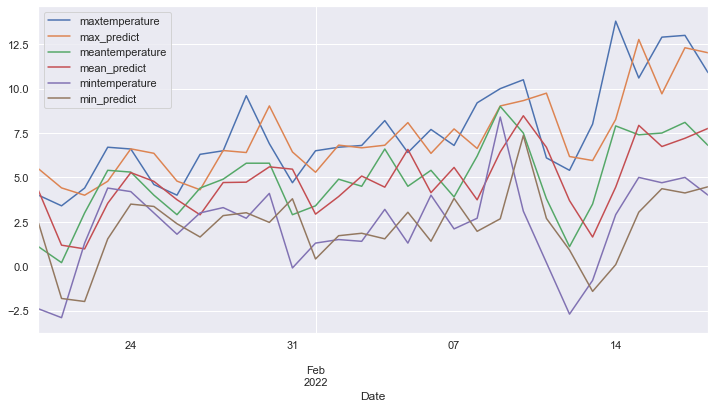

In [78]:
pltframe['2022-01-20':'2022-03-18'][['maxtemperature', 'max_predict','meantemperature','mean_predict','mintemperature','min_predict']].plot()

In [50]:
from statsmodels.tsa import stattools

In [51]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            stattools.adfuller(data)
    
    print(f"""   
            adf: {round(adf_stats,2)}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            {round(levels['1%'],2)} (p=1; CI=99%) 
            {round(levels['5%'],2)} (p=5; CI=95%)
            {round(levels['10%'],2)} (p=10 CI=90%) 
            information criterion (AIC): {information_criterion}
            """)

In [52]:
statmax = wmax['remainder']
statmin = wmin['remainder']
statmean = wmean['remainder']

In [53]:
statmax.head(4)

Date
1876-01-01    -8.954485
1876-01-02    -9.682918
1876-01-03    -9.693559
1876-01-04   -14.263410
Name: remainder, dtype: float64

In [54]:
print_adf(statmean)

   
            adf: -20.52
            p: 0.0 
            used lag: 58 
            number of observations: 53121
            -3.43 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 238242.227174279
            


In [55]:
print_adf(statmax)

   
            adf: -20.8
            p: 0.0 
            used lag: 58 
            number of observations: 53126
            -3.43 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 262671.5562644143
            


In [56]:
print_adf(statmin)

   
            adf: -19.69
            p: 0.0 
            used lag: 58 
            number of observations: 53126
            -3.43 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 247128.6240605407
            


In [57]:
Xmx

,timestep,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19
Date,,,,,,,,,,,,,,,,,,,,,
1876-01-20,19,0,0,0,0,0,0,0,0,0,...,-18.538410,-22.214669,-19.146076,-17.003913,-17.036122,-19.324051,-14.263410,-9.693559,-9.682918,-8.954485
1876-01-21,20,0,0,0,0,0,0,0,0,0,...,-17.516328,-18.538410,-22.214669,-19.146076,-17.003913,-17.036122,-19.324051,-14.263410,-9.693559,-9.682918
1876-01-22,21,0,0,0,0,0,0,0,0,0,...,-15.714154,-17.516328,-18.538410,-22.214669,-19.146076,-17.003913,-17.036122,-19.324051,-14.263410,-9.693559
1876-01-23,22,0,0,0,0,0,0,0,0,0,...,-14.947907,-15.714154,-17.516328,-18.538410,-22.214669,-19.146076,-17.003913,-17.036122,-19.324051,-14.263410
1876-01-24,23,0,0,0,0,0,0,0,0,0,...,-14.499222,-14.947907,-15.714154,-17.516328,-18.538410,-22.214669,-19.146076,-17.003913,-17.036122,-19.324051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,53180,0,0,0,0,0,0,0,0,0,...,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703,-5.202215,-7.692736,-7.794397,-10.199208
2022-02-15,53181,0,0,0,0,0,0,0,0,0,...,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703,-5.202215,-7.692736,-7.794397
2022-02-16,53182,0,0,0,0,0,0,0,0,0,...,-6.585707,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703,-5.202215,-7.692736


In [58]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=100)

In [59]:
# Split the training data into folds
for i, (train_index, validation_index) in enumerate(ts_split.split(Xmx, ymx)):
    print(f"""The training data for the {i+1}th iteration are the observations steps 
    {train_index}""")
    print(f"""The validation data for the {i+1}th iteration are the observations steps
    {validation_index}""")
    print('\n')
    

The training data for the 1th iteration are the observations steps 
    [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228

In [60]:
# Create the time series split
time_series_split = ts_split.split(Xmx, ymx) 

In [61]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result = cross_val_score(estimator=mx, 
                         X=Xmx, y=ymx,
                         cv=time_series_split)
result

array([0.92032134, 0.90282703, 0.89321328, 0.87542627, 0.8636477 ,
       0.89729484, 0.87624504, 0.91348592, 0.92679112, 0.91574506,
       0.90579329, 0.89565185, 0.92416049, 0.91426025, 0.88193774,
       0.8921555 , 0.92218383, 0.8955599 , 0.91158002, 0.90428942,
       0.8907449 , 0.89207884, 0.86080533, 0.90012682, 0.87494078,
       0.88337383, 0.86398533, 0.91446068, 0.88140163, 0.849305  ,
       0.89293359, 0.84820174, 0.88224325, 0.88313042, 0.89714202,
       0.89027432, 0.86782896, 0.89278107, 0.89195293, 0.91570912,
       0.87722963, 0.90876088, 0.86664934, 0.9109441 , 0.91368916,
       0.8600935 , 0.9124834 , 0.91640736, 0.8778195 , 0.87975081,
       0.88877949, 0.9143678 , 0.90680764, 0.89772767, 0.89272813,
       0.88448463, 0.9096361 , 0.85415495, 0.90228912, 0.90757422,
       0.88573898, 0.88711017, 0.8844174 , 0.92891754, 0.89020123,
       0.89709469, 0.87511783, 0.89342238, 0.9001113 , 0.89221345,
       0.90221672, 0.88173432, 0.91390119, 0.88748659, 0.90496

In [62]:
#meantest
maxtest
#mintest

,maxtemperature
Date,
2022-02-19,8.3
2022-02-20,9.0
2022-02-21,10.5
2022-02-22,8.2
2022-02-23,10.3
2022-02-24,10.3
2022-02-25,7.5
2022-02-26,6.7
2022-02-27,4.4


In [63]:
# Get last timestep of the training data
last_train_timestep = Xmx['timestep'][-1]

In [64]:
Xmx.tail(2)

,timestep,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-17,53183,0,0,0,0,0,0,0,0,0,...,-7.453499,-6.585707,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703,-5.202215
2022-02-18,53184,0,0,0,0,0,0,0,0,0,...,-4.895661,-7.453499,-6.585707,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703


In [66]:
# What is the first date in the future? --> 1961-01-01

timestep = Xmx['timestep'].max() + 1

day = [0] * 30
day[17] = 1

lag19 = Xmx.loc['2022-02-18', 'lag18']
lag18 = Xmx.loc['2022-02-18', 'lag17']
lag17 = Xmx.loc['2022-02-18', 'lag16']
lag16 = Xmx.loc['2022-02-18', 'lag15']
lag15 = Xmx.loc['2022-02-18', 'lag14']
lag14 = Xmx.loc['2022-02-18', 'lag13']
lag13 = Xmx.loc['2022-02-18', 'lag12']
lag12 = Xmx.loc['2022-02-18', 'lag11']
lag11 = Xmx.loc['2022-02-18', 'lag10']
lag10 = Xmx.loc['2022-02-18', 'lag9']
lag9 = Xmx.loc['2022-02-18', 'lag8']
lag8 = Xmx.loc['2022-02-18', 'lag7']
lag7 = Xmx.loc['2022-02-18', 'lag6']
lag6 = Xmx.loc['2022-02-18', 'lag5']
lag5 = Xmx.loc['2022-02-18', 'lag4']
lag4 = Xmx.loc['2022-02-18', 'lag3']
lag3 = Xmx.loc['2022-02-18', 'lag2']
lag2 = Xmx.loc['2022-02-18', 'lag1']
lag1 = Nmax.loc['2022-02-18', 'remainder']

In [139]:
timestep, day, lag19, lag18, lag7, lag16, lag15, lag14, lag13, lag12, lag11, lag10, lag9, lag8, lag7, lag6, lag5, lag4, lag3, lag2, lag1

(53185,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 -9.534132032189053,
 -7.704070911385303,
 -8.563739103604984,
 -7.4431441379299255,
 -6.01299539651116,
 -7.873636128776608,
 -6.58570706699171,
 -7.45349882900544,
 -4.89566130040132,
 -4.16425397774686,
 -3.587995396511161,
 -7.86591301664846,
 -8.563739103604984,
 -5.897491964016883,
 -0.14880775349056563,
 -3.284448485756011,
 -1.0496086688223745,
 -0.9878237717972027,
 -3.029700202003152)

In [130]:
#lag = [lag1, lag2, lag3, lag4, lag5, lag6, lag7, lag8, lag9, lag10, lag11, lag12, lag13, lag14, lag15, lag16, lag17, lag18, lag19]

In [67]:
X_future = [timestep]
X_future.extend(day)
X_future

[53185,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [68]:
X_future.append(lag1)
X_future.append(lag2)
X_future.append(lag3)
X_future.append(lag4)
X_future.append(lag5)
X_future.append(lag6)
X_future.append(lag7)
X_future.append(lag8)
X_future.append(lag9)
X_future.append(lag10)
X_future.append(lag11)
X_future.append(lag12)
X_future.append(lag13)
X_future.append(lag14)
X_future.append(lag15)
X_future.append(lag16)
X_future.append(lag17)
X_future.append(lag18)
X_future.append(lag19)


X_future

[53185,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -3.029700202003152,
 -0.9878237717972027,
 -1.0496086688223745,
 -3.284448485756011,
 -0.14880775349056563,
 -5.897491964016883,
 -8.563739103604984,
 -7.86591301664846,
 -3.587995396511161,
 -4.16425397774686,
 -4.89566130040132,
 -7.45349882900544,
 -6.58570706699171,
 -7.873636128776608,
 -6.01299539651116,
 -7.4431441379299255,
 -7.532503405664481,
 -7.704070911385303,
 -9.534132032189053]

In [70]:
Xmx[-4:]

,timestep,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-15,53181,0,0,0,0,0,0,0,0,0,...,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703,-5.202215,-7.692736,-7.794397
2022-02-16,53182,0,0,0,0,0,0,0,0,0,...,-6.585707,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703,-5.202215,-7.692736
2022-02-17,53183,0,0,0,0,0,0,0,0,0,...,-7.453499,-6.585707,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703,-5.202215
2022-02-18,53184,0,0,0,0,0,0,0,0,0,...,-4.895661,-7.453499,-6.585707,-7.873636,-6.012995,-7.443144,-7.532503,-7.704071,-9.534132,-8.102703


In [71]:
print(X_future)

[53185, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.029700202003152, -0.9878237717972027, -1.0496086688223745, -3.284448485756011, -0.14880775349056563, -5.897491964016883, -8.563739103604984, -7.86591301664846, -3.587995396511161, -4.16425397774686, -4.89566130040132, -7.45349882900544, -6.58570706699171, -7.873636128776608, -6.01299539651116, -7.4431441379299255, -7.532503405664481, -7.704070911385303, -9.534132032189053]


In [72]:
X_future = pd.DataFrame([X_future])
X_future.columns = Xmx.columns

In [77]:
prediction = mx.predict(X_future)
prediction

array([10.39171136])